In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

In [4]:
# import flask library
from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# create engine to hawaii.sqlite - thru Resources folder
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

In [10]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table - class names measurement and station
measure = base.classes.measurement
station = base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [13]:
# Add flask setup
app = Flask(__name__)

In [14]:
## Get and test the class structure / table schema for measure
qury_measure = session.query(measure)
qury_measure.__dict__

{'session': <sqlalchemy.orm.session.Session at 0x196062097f0>,
 '_polymorphic_adapters': {},
 '_entities': [<sqlalchemy.orm.query._MapperEntity at 0x19606268970>],
 '_primary_entity': <sqlalchemy.orm.query._MapperEntity at 0x19606268970>,
 '_has_mapper_entities': True,
 '_mapper_adapter_map': {sqlalchemy.ext.automap.measurement: (<Mapper at 0x19606230940; measurement>,
   None)}}

In [95]:
## Get and test the class structure / table schema for station
qury_measure = session.query(station)
qury_measure.__dict__

{'session': <sqlalchemy.orm.session.Session at 0x2c0f6cd05e0>,
 '_polymorphic_adapters': {},
 '_entities': [<sqlalchemy.orm.query._MapperEntity at 0x2c0f6ce6c70>],
 '_primary_entity': <sqlalchemy.orm.query._MapperEntity at 0x2c0f6ce6c70>,
 '_has_mapper_entities': True,
 '_mapper_adapter_map': {sqlalchemy.ext.automap.station: (<Mapper at 0x2c0f6ce6910; station>,
   None)}}

In [15]:
# Setup all flask routes
@app.route("/")
def home():
    print("Server received request for 'Home' page...")
    return ("Welcome to my 'Home' page!"
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/<start><br/>"
        f"/api/v1.0/<start>/<end>")

In [ ]:
# Precipitation Route, return JSON
@app.route("/api/v1.0/precipitation")
def precipitation():
    print("Server received request for 'Precipitation' page...")
    return "Welcome to my 'Precipitation' page!"

# Exploratory Precipitation Analysis

In [96]:
# Find the most recent date in the data set.
starter_date = session.query(measure.date).order_by(measure.date.asc()).first()
print(starter_date)

('2010-01-01',)


('2017-08-23',)
2016-08-23
2017-08-23
[('2016-08-23', 0.0), ('2016-08-23', 0.15), ('2016-08-23', 0.05), ('2016-08-23', None), ('2016-08-23', 0.02), ('2016-08-23', 1.79), ('2016-08-23', 0.7), ('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('20

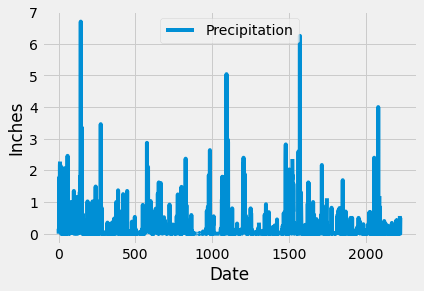

In [115]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Starting from the most recent point means starting from the latest date, so same formula as above, but now desc instead of asc
end_date = session.query(measure.date).order_by(measure.date.desc()).first()
print(end_date)
# Not sure why end_date is returned as list, but converting to single date with datetime below

# Calculate the date one year from the last date in data set.
# Use datetime library imported
one_year = dt.timedelta(days = 365)
# print(one_year)
end_year = dt.date(2017,8,23)
end_date_minus_one = end_year - one_year
print(end_date_minus_one)
print(end_year)

# Perform a query to retrieve the data and precipitation scores
scores = session.query(measure.date, measure.prcp).\
    filter(measure.date >= end_date_minus_one).\
    filter(measure.date < end_year).\
    order_by(measure.date).all()
print(scores)

# Save the query results as a Pandas DataFrame and set the index to the date column
scores_df = pd.DataFrame(scores, columns = ["Date", "Precipitation"])
# print(scores_df)
scores_df_indexed = scores_df.set_index("Date")

# Sort the dataframe by date
scores_df_indexed.head()

# Use Pandas Plotting with Matplotlib to plot the data
scores_df.plot()
plt.xlabel("Date")
plt.ylabel("Inches")
plt.savefig("Images/precipitation-from-code.png")
plt.show()

In [16]:
return jsonify(scores)

SyntaxError: 'return' outside function (<ipython-input-16-f85a5f650979>, line 1)

In [116]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# Just use simple describe method
scores_df.describe()

Precipitation
count    2017.000000
mean        0.177367
std         0.461568
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000

# Exploratory Station Analysis

In [17]:
# Assign station route
@app.route("/api/v1.0/stations")
def station():

SyntaxError: unexpected EOF while parsing (<ipython-input-17-10840df4bf3d>, line 3)

In [20]:
return jsonify(station)

SyntaxError: 'return' outside function (<ipython-input-20-23af8d0c4cdf>, line 1)

In [126]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measure.station, func.count(measure.station)).\
    group_by(measure.station).\
    order_by(func.count(measure.station)).all()
# Most active stations are at bottom of list

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [134]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
top_station = "USC00519281"
# Use func.min, func.max, and func.avg functions
# Min
top_station_min = session.query(func.min(measure.tobs)).\
    filter(measure.station == top_station).all()
top_station_min

[(54.0)]

In [135]:
# Max
top_station_max = session.query(func.max(measure.tobs)).\
    filter(measure.station == top_station).all()
top_station_max

[(85.0)]

In [136]:
# Avg
top_station_avg = session.query(func.avg(measure.tobs)).\
    filter(measure.station == top_station).all()
top_station_avg

[(71.66378066378067)]

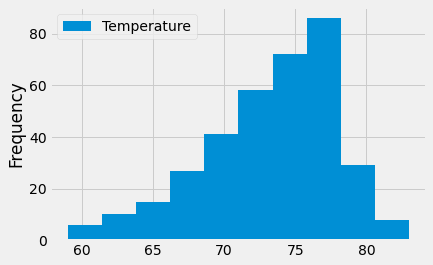

In [146]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data_filtered = session.query(measure.tobs).\
    filter(measure.date >= end_date_minus_one).\
    filter(measure.date < end_year).\
    filter(measure.station == top_station).\
    order_by(measure.date).all()
temp_df = pd.DataFrame(temp_data_filtered, columns = ["Temperature"])
temp_df.plot.hist()
plt.savefig("Images/station_histogram_from_code")
plt.show()

# Close session

In [147]:
# Close Session
session.close()